In [1]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [2]:
qphh_min = 1700
qphh_max = 3000
dbsize_min = 390
dbsize_max = 1800

In [3]:
def fitness_prop(current_qphh, current_dbsize):
    return current_qphh * dbsize_min/current_dbsize

In [12]:
def fitness_prop_squared(current_qphh, current_dbsize):
    return current_qphh**2 * dbsize_min/current_dbsize

In [4]:
def fitness_log(current_qphh, current_dbsize):
    return current_qphh * (1 / np.log10(current_dbsize + 1))

In [5]:
def fitness_logc(current_qphh, current_dbsize):
    return current_qphh * (1 / np.log10(current_dbsize - dbsize_min))

In [16]:
def fitness_logc_squared(current_qphh, current_dbsize):
    return (current_qphh**2) * (1 / np.log10(current_dbsize - dbsize_min))

In [6]:
def get_xyz(fitness_fn, step=100):
    x, y, z = [], [], []
    for q in np.arange(qphh_min+step, qphh_max, step):
        for s in np.arange(dbsize_min+step, dbsize_max, step):
            f = fitness_fn(q, s)        
            x.append(q)
            y.append(s)
            z.append(f)
    return np.asarray(x), np.asarray(y), np.asarray(z)

In [7]:
def plot_scatter(x, y, z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.scatter(x, y, z, s=1, cmap=cm.coolwarm,)
    ax.set_xlabel('QPHH')
    ax.set_ylabel('DBSIZE')
    ax.set_zlabel('Fitness')

In [8]:
def plot_surface(x, y, z, title, elev=20, azim=133, outfile=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # note this: you can skip rows!
    xig, yig, zi = get_3d_data(x, y, z)

    surf = ax.plot_surface(xig, yig, zi, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False,)

    ax.xaxis.set_major_formatter(FormatStrFormatter('%4.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%4.0f'))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%4.e'))
    
    ax.set_xlabel('$\mathcal{Q}(\mathbf{x})$')
    ax.set_ylabel('$\mathcal{M}(\mathbf{x})$')
    ax.set_zlabel(title)
    ax.view_init(elev=elev, azim=azim)
    
#     plt.title(title)
    # plt.show()
    if outfile is not None:
        plt.savefig(outfile)

In [9]:
def get_3d_data(X, Y, Z):     

    xi = np.linspace(X.min(),X.max(),len(X))
    yi = np.linspace(Y.min(),Y.max(),len(Y))        
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')        
    xig, yig = np.meshgrid(xi, yi)
    return xig, yig, zi

In [10]:
def get_settings(fit_func):
    __settings__ = {
        'fc': {
            'elev': 20,
            'azim': 133,
            'title': '$\mathcal{F}_C(\mathbf{x})$'
        }
    }
    
    return __settings__[fit_func]

<IPython.core.display.Javascript object>


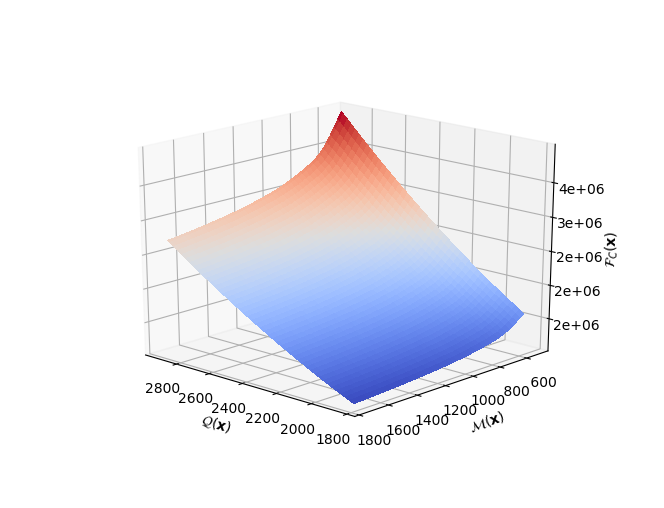

In [17]:
x, y, z = get_xyz(fitness_logc_squared, step=135)
settings = get_settings('fc')
plot_surface(x, y, z, **settings)